In [10]:
!pip install imblearn

  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)


In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import cv2
from glob import glob

import sklearn
import skimage
from skimage.transform import resize


import random
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skimage.color import rgb2gray

In [24]:
train_dir = "chest_xray/train/" 
test_dir = "chest_xray/test/"             

LOAD_FROM_IMAGES=False #at first it's True 

#folder is equal to train_dir or test_dir

def get_data(folder):
    X = []         #create an empty array
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith("."):
            if folderName in ["NORMAL"]:
                label = 0 
            elif folderName in ["PNEUMONIA"]:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + "/" + image_filename) #reading the image
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (150,150,3), mode="constant", anti_aliasing=True)
                    img_file = rgb2gray(img_file)
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X, y

if LOAD_FROM_IMAGES:
    X_train, y_train = get_data(train_dir)
    X_test, y_test = get_data(test_dir)
    
    np.save("xtrain.npy", X_train)
    np.save("ytrain.npy", y_train)
    np.save("xtest.npy", X_test)
    np.save("ytest.npy", y_test)
    
    

100%|██████████| 328/328 [00:53<00:00,  6.13it/s]


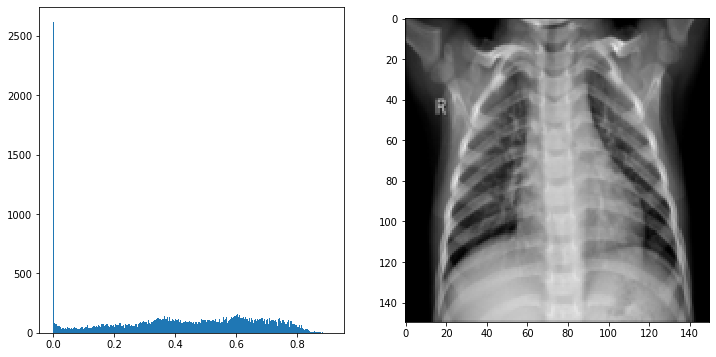

In [33]:
def plotHistogram(a):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.hist(a.ravel(), bins=255)
    plt.subplot(1,2,2)
    plt.imshow(a, cmap="gray", vmin=0, vmax=1)
    plt.show()
    
    
plotHistogram(X_train[3])
    

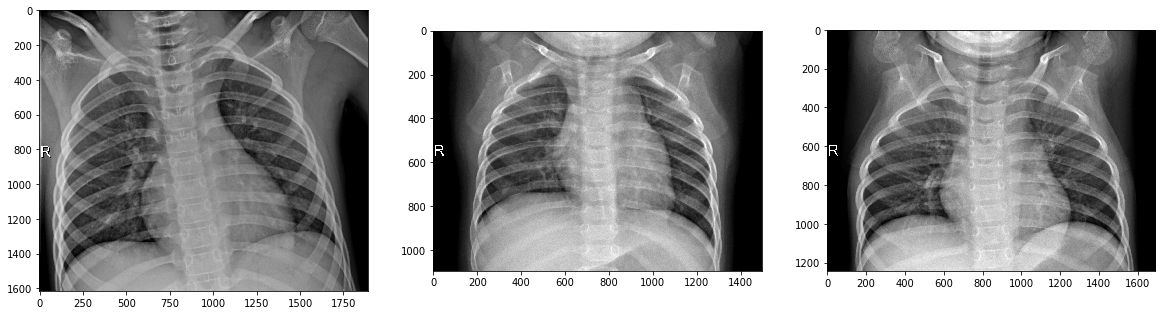

In [34]:
multipleImages = glob('chest_xray/train/NORMAL/**')
def plotThreeImages(images):
    r = random.sample(images, 3) #creating r through three random images
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
plotThreeImages(multipleImages)

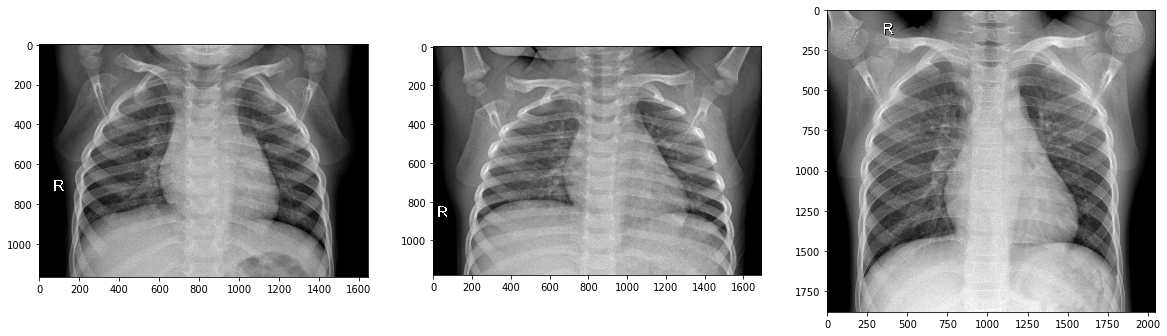

In [39]:
plotThreeImages(multipleImages)

Sin Neumonía


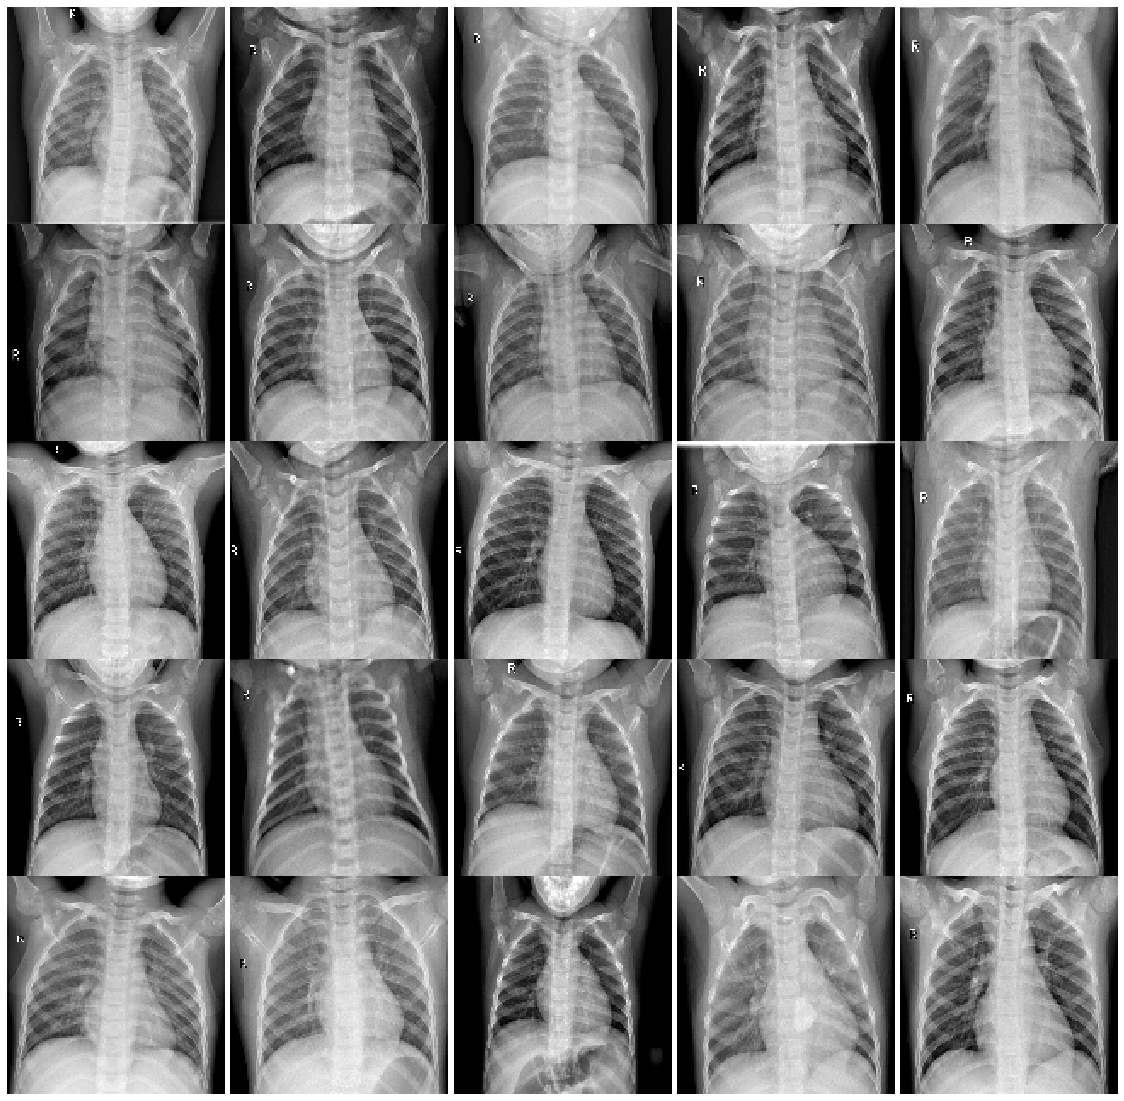

In [42]:
print("Sin Neumonía")
multipleImages = glob('chest_xray/train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Si neumonía


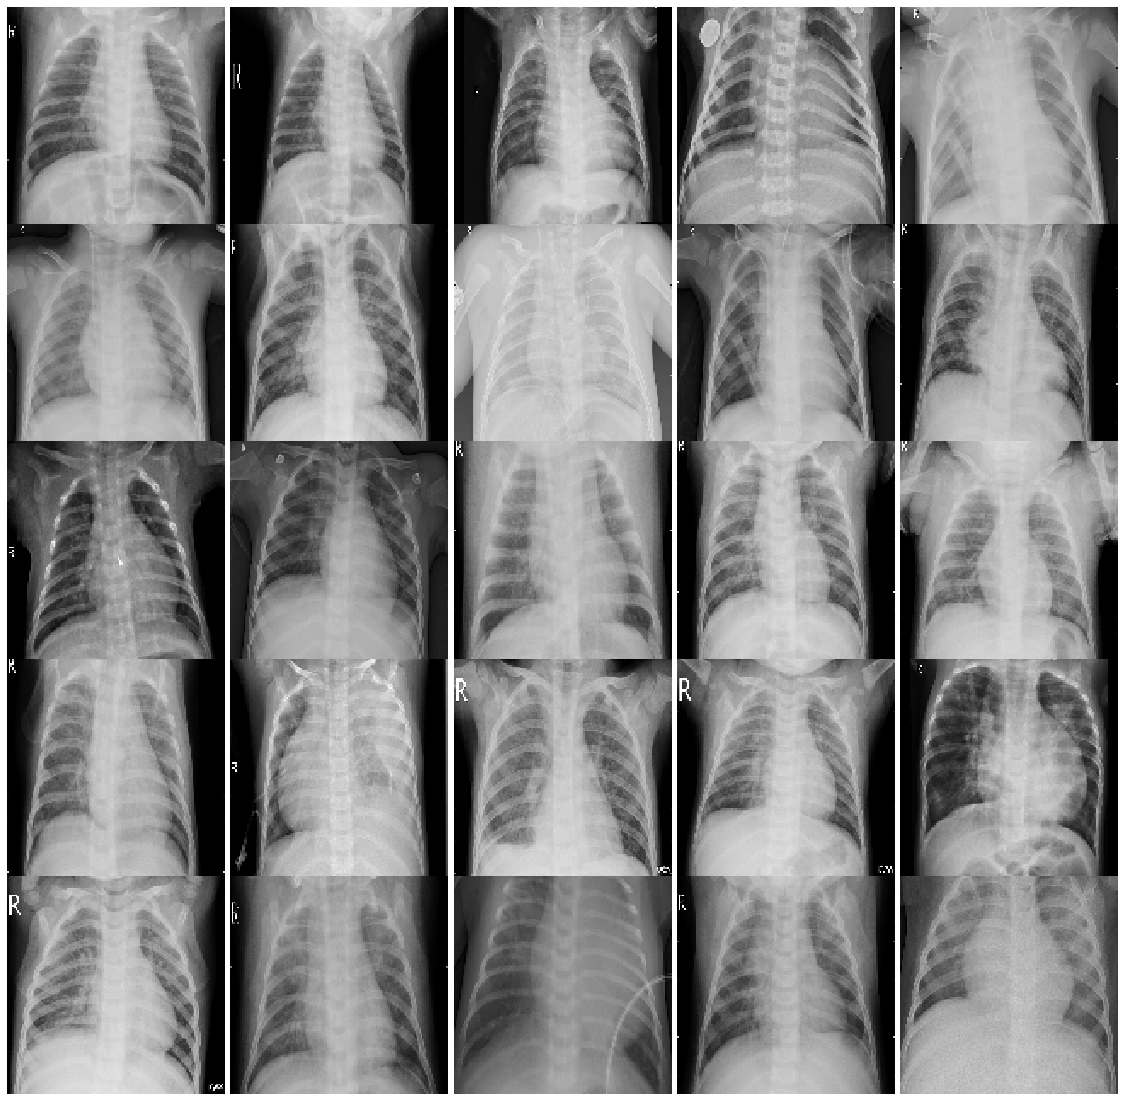

In [43]:
print("Si neumonía")
multipleImages = glob('chest_xray/train/PNEUMONIA/**')
i_ = 0
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

{0: 'No Neumonía', 1: 'Si Neumonía'}


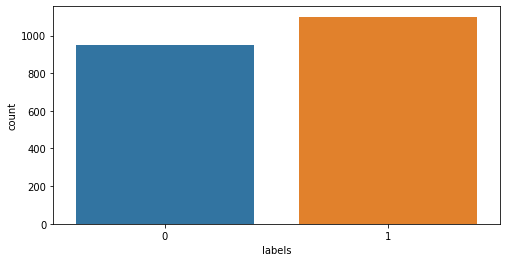

In [44]:
import seaborn as sns

plt.figure(figsize=(8,4))
map_characters = {0: 'No Neumonía', 1: 'Si Neumonía'}
dict_characters=map_characters

df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [45]:
X_trainReshaped = X_train.reshape(len(X_train), 150,150,1)
X_testReshaped = X_test.reshape(len(X_test), 150,150,1)

In [46]:
X_trainReshaped.shape

(2051, 150, 150, 1)

In [50]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150,1)))
model.add(layers.MaxPooling2D(2,2))

#hidden layer
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
#hidden layer
model.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150,1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150,1)))

#flatten
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))

#output - ill or not
model.add(layers.Dense(2, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)       

In [53]:
import datetime

In [61]:
!dir logs pneumo

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: AC12-6EB1

 Directorio de C:\Users\Juan Ignacio\Machine Learning Notebooks\logs

01 jul. 2020  23:39    <DIR>          .
01 jul. 2020  23:39    <DIR>          ..
01 jul. 2020  23:38    <DIR>          pneumo
               0 archivos              0 bytes

 Directorio de C:\Users\Juan Ignacio\Machine Learning Notebooks



No se encuentra el archivo


In [64]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_trainReshaped, 
          y_train, 
          epochs=20,
          validation_data = (X_testReshaped,y_test)
         )

Train on 2051 samples, validate on 527 samples
Epoch 1/20
2051/2051 [==============================] - 114s 56ms/sample - loss: 0.5409 - accuracy: 0.6831 - val_loss: 0.4970 - val_accuracy: 0.7400
Epoch 2/20
2051/2051 [==============================] - 111s 54ms/sample - loss: 0.2486 - accuracy: 0.8913 - val_loss: 0.4255 - val_accuracy: 0.8102
Epoch 3/20
2051/2051 [==============================] - 110s 54ms/sample - loss: 0.1754 - accuracy: 0.9298 - val_loss: 0.4557 - val_accuracy: 0.8102
Epoch 4/20
2051/2051 [==============================] - 111s 54ms/sample - loss: 0.1710 - accuracy: 0.9376 - val_loss: 1.1341 - val_accuracy: 0.7230
Epoch 5/20
2051/2051 [==============================] - 110s 54ms/sample - loss: 0.1190 - accuracy: 0.9537 - val_loss: 0.6214 - val_accuracy: 0.8121
Epoch 6/20
2051/2051 [==============================] - 111s 54ms/sample - loss: 0.0958 - accuracy: 0.9620 - val_loss: 0.3699 - val_accuracy: 0.8672
Epoch 7/20
2051/2051 [==============================] - 110

In [65]:
test_loss, test_acc = model.evaluate(X_testReshaped, y_test)
print(test_acc)

527/527 [==============================] - 6s 12ms/sample - loss: 1.1514 - accuracy: 0.7856
0.7855787


In [67]:
test_loss, test_acc = model.evaluate(X_trainReshaped, y_train)
#the model is overfitted

 256/2051 [==>...........................] - ETA: 22s - loss: 0.0399 - accuracy: 0.9961

KeyboardInterrupt: 